In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn import preprocessing

warnings.filterwarnings('ignore')

#### Загрузка данных

##### Описание датасета

- __Id__ - идентификационный номер квартиры
- __DistrictId__ - идентификационный номер района
- __Rooms__ - количество комнат
- __Square__ - площадь
- __LifeSquare__ - жилая площадь
- __KitchenSquare__ - площадь кухни
- __Floor__ - этаж
- __HouseFloor__ - количество этажей в доме
- __HouseYear__ - год постройки дома
- __Ecology_N__ - экологические показатели местности
- __Social_N__ - социальные показатели местности
- __Healthcare_N__ - показатели местности, связанные с охраной здоровья
- __Shops_N__ - показатели, связанные с наличием магазинов, торговых центров
- __Price__ - цена квартиры

In [6]:
PATH_TRAIN = './train.csv'
PATH_TEST = './test.csv'
PATH_OUT = './out.csv'
TARGET = 'Price'

In [3]:
ds = pd.read_csv(PATH_TRAIN)
ds.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [5]:
ds.shape

(10000, 20)

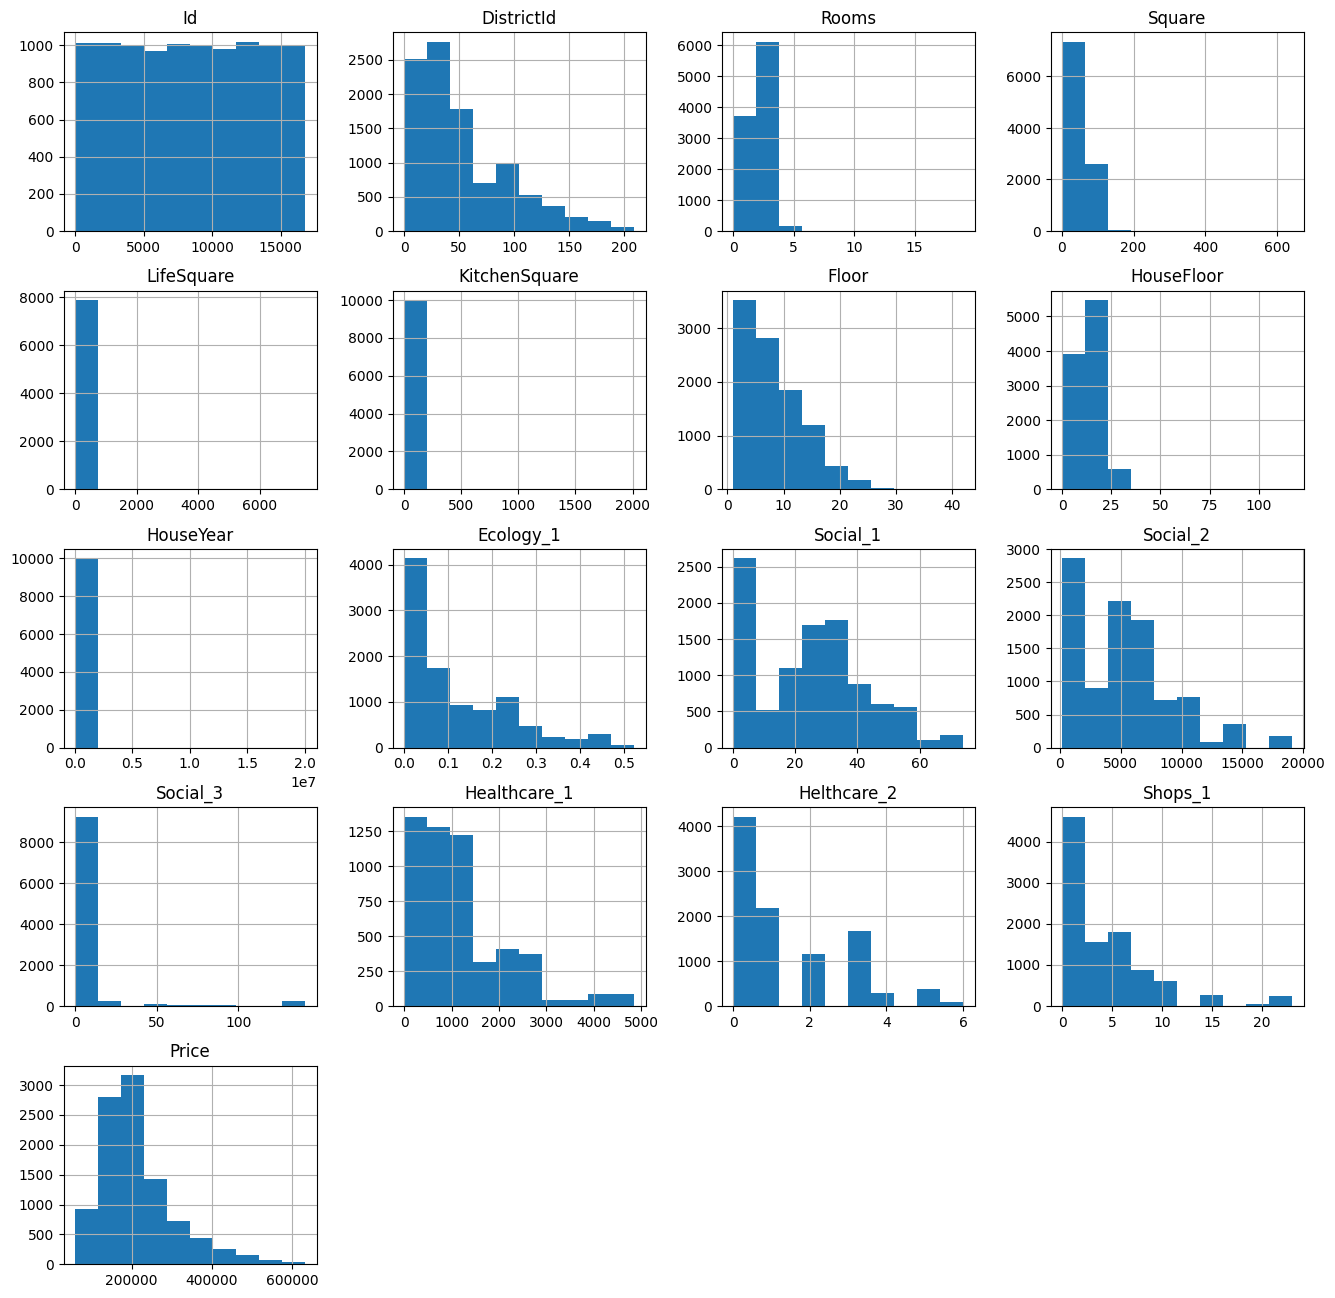

In [7]:
ds.hist(figsize=(16,16))
plt.show()

In [8]:
ds.loc[(ds['HouseYear'] > 2022), 'HouseYear']

8828        4968
9163    20052011
Name: HouseYear, dtype: int64

In [9]:
ds['LifeSquare'].isnull().sum()

2113

<AxesSubplot:>

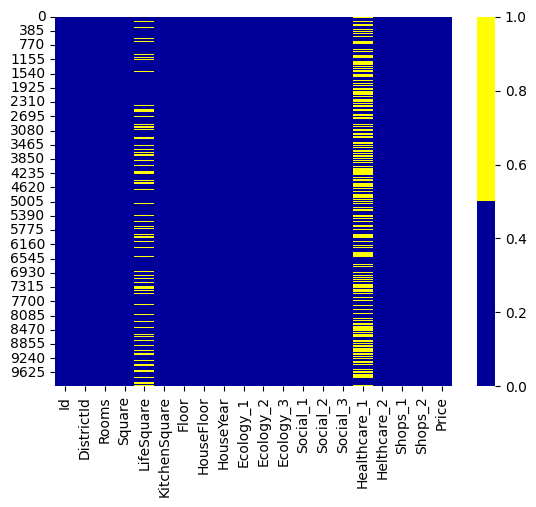

In [12]:
ds.drop('Id', axis=1)
colours = ['#000099', '#ffff00']
sns.heatmap(ds.isnull(), cmap=sns.color_palette(colours))

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
Id,1.000000,0.012973,-0.005847,-0.010071,0.018449,0.019880,0.001348,-0.008376,0.005004,0.018097,-0.000772,-0.002033,-0.009358,-0.003879,0.001502,-0.008718,0.009880
DistrictId,0.012973,1.000000,0.071432,-0.026613,-0.019910,0.040358,-0.120373,-0.149051,0.013430,0.065294,0.246463,0.167479,0.136095,0.304335,0.306147,0.174214,0.265100
Rooms,-0.005847,0.071432,1.000000,0.662893,0.131336,0.005123,-0.000665,-0.029302,-0.010612,-0.032347,0.075980,0.071335,0.012811,0.042857,0.063557,0.053618,0.550291
Square,-0.010071,-0.026613,0.662893,1.000000,0.196129,0.008320,0.114791,0.081505,-0.009032,-0.064479,-0.070690,-0.043120,0.035241,-0.039748,-0.022960,0.021357,0.520075
LifeSquare,0.018449,-0.019910,0.131336,0.196129,1.000000,-0.001195,0.024559,0.027442,-0.002210,-0.023629,-0.048363,-0.039283,0.012763,-0.026867,-0.024762,-0.007569,0.081292
KitchenSquare,0.019880,0.040358,0.005123,0.008320,-0.001195,1.000000,-0.011397,0.000780,0.000958,-0.005622,0.043379,0.037805,-0.015140,0.009472,0.043170,0.010216,0.028864
Floor,0.001348,-0.120373,-0.000665,0.114791,0.024559,-0.011397,1.000000,0.418986,0.000928,-0.016133,-0.044914,-0.016560,-0.002237,-0.138294,-0.065537,0.024264,0.128715
HouseFloor,-0.008376,-0.149051,-0.029302,0.081505,0.027442,0.000780,0.418986,1.000000,-0.000864,-0.004362,-0.020801,0.007194,-0.008137,-0.143973,-0.068728,0.026279,0.088280
HouseYear,0.005004,0.013430,-0.010612,-0.009032,-0.002210,0.000958,0.000928,-0.000864,1.000000,0.001465,0.003026,0.001970,0.000819,-0.011969,0.011245,0.003681,0.004305
Ecology_1,0.018097,0.065294,-0.032347,-0.064479,-0.023629,-0.005622,-0.016133,-0.004362,0.001465,1.000000,0.026464,0.009264,-0.124068,-0.043547,0.030873,-0.076749,-0.058381


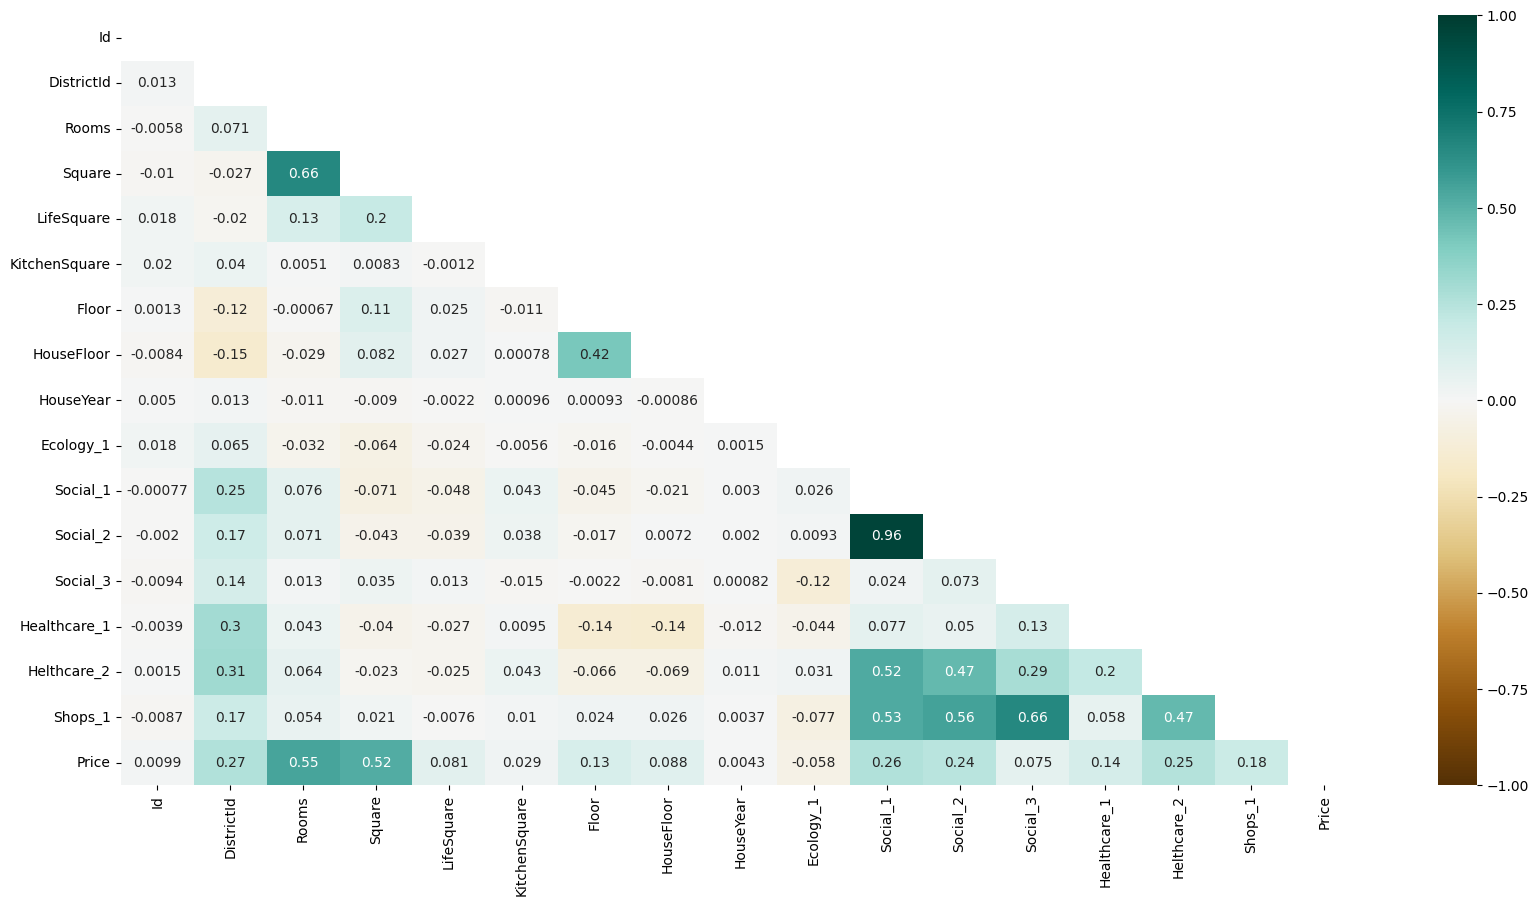

In [13]:
plt.figure(figsize=(20,10))
c= ds.corr()
cor_matrix_mask = np.triu(np.ones_like(c, dtype=bool))
sns.heatmap(c,cmap="BrBG",annot=True, vmin=-1, vmax=1, mask=cor_matrix_mask)
c

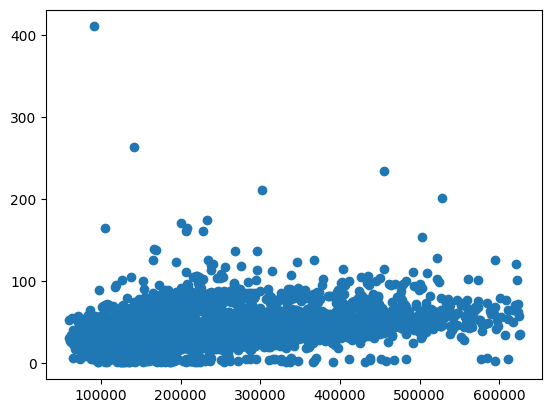

In [37]:
# ds.drop(ds.loc[ds['LifeSquare'].max()==ds['LifeSquare']].index, inplace=True)
plt.scatter(ds['Price'],ds['LifeSquare'])

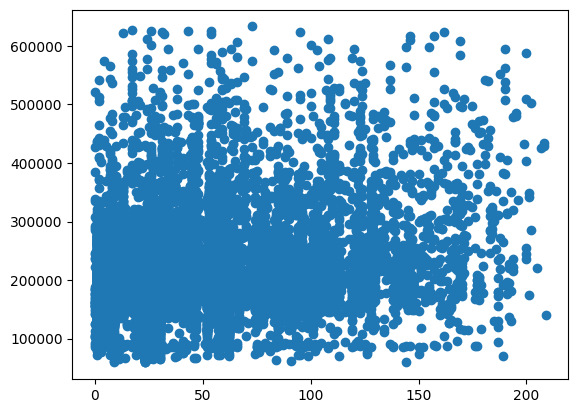

In [18]:
plt.scatter(ds['DistrictId'],ds['Price'])

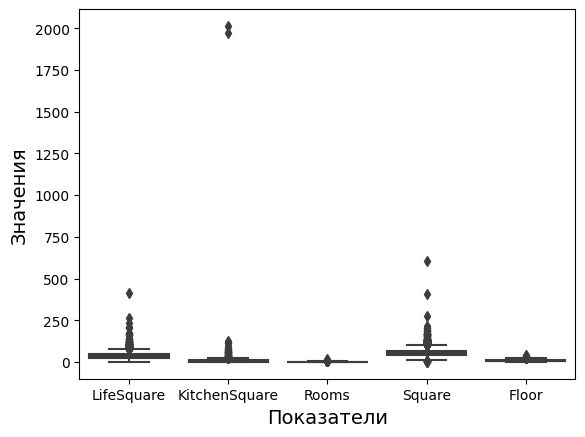

In [38]:
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(ds[['LifeSquare','KitchenSquare','Rooms','Square','Floor']]))
boxplot.set_xlabel("Показатели", fontsize=14)
boxplot.set_ylabel("Значения", fontsize=14);

In [39]:
num_rows = len(ds.index)
low_information_cols = [] #

for col in ds.columns:
    cnts = ds[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Ecology_2: 99.02971%
B    9900
A      97
Name: Ecology_2, dtype: int64

Ecology_3: 97.24917%
B    9722
A     275
Name: Ecology_3, dtype: int64



Признаки Ecology_2 и Ecology_3 имеют слишком много повторений, признак неинформативен, можно дропнуть

In [40]:
ds = ds.drop(['Ecology_2','Ecology_3'], axis=1)

In [42]:
ds.groupby(['DistrictId']).agg(
    hf_median=('HouseFloor', np.median),
    lq_median=('LifeSquare', np.median),
    kq_median=('KitchenSquare', np.median)
).reset_index()

,DistrictId,hf_median,lq_median,kq_median
0,0,12.0,31.404044,7.5
1,1,17.0,42.457422,1.0
2,2,9.0,30.884992,7.0
3,3,12.0,29.853087,6.5
4,4,8.0,50.643797,7.0
...,...,...,...,...
200,202,6.5,44.687149,7.5
201,205,12.0,18.663548,8.0
202,207,5.0,55.770043,7.0
203,208,8.0,33.397584,7.5
